# Support vector machine

In [ ]:
it is used for both classification as well as regression 

In [7]:
SVM helps to find line or Decision boundary is called as hyperplane 

1.Support Vectors
>> Data points which are closest to hyperplane 
these vector supports to the hyperplane so it called as support vectors
2.Margine 
Distance between two support vectors 
>> Maximum margin
3.Optimal hyperplane :
    The hyperplane with maximum margin called as optimal hyperplan
    

SyntaxError: invalid syntax (<ipython-input-7-fb1f41b35957>, line 1)

In [99]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [100]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [101]:
import pandas as pd
df = pd.read_csv(r"D:/Daily_Class_Note/3_11_SVM_Feature_Selection/apples_and_oranges.csv")

In [102]:
df.sample(5)

,Weight,Size,Class
15,65,4.48,orange
32,72,5.72,apple
1,69,4.21,orange
18,67,4.18,orange
20,66,4.13,orange


In [103]:
pd.cut(df['Size'],2,labels=['low','medium'])

0        low
1        low
2        low
3     medium
4        low
5     medium
6     medium
7     medium
8     medium
9        low
10    medium
11    medium
12    medium
13       low
14    medium
15       low
16       low
17    medium
18       low
19    medium
20       low
21       low
22       low
23       low
24       low
25    medium
26       low
27       low
28    medium
29    medium
30    medium
31       low
32    medium
33    medium
34       low
35       low
36       low
37    medium
38    medium
39    medium
Name: Size, dtype: category
Categories (2, object): ['low' < 'medium']

In [104]:
# Define the range of values and the number of bins
minimum = 1
maximum = 20
num_bins = 3

# Create the bins and labels
bin_size = (maximum - minimum) / num_bins
bins = [minimum + i * bin_size for i in range(num_bins + 1)]
labels = ['low', 'medium', 'high']

# Create a list of values
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Assign each value to a bin
buckets = {}
for value in values:
    for i in range(num_bins):
        if value >= bins[i] and value < bins[i + 1]:
            if labels[i] in buckets:
                buckets[labels[i]].append(value)
            else:
                buckets[labels[i]] = [value]

# Print the resulting buckets
for label, bucket in buckets.items():
    print(f"{label}: {bucket}")


low: [1, 2, 3, 4, 5, 6, 7]
medium: [8, 9, 10]


In [105]:
bins

[1.0, 7.333333333333333, 13.666666666666666, 20.0]

In [106]:
import numpy as np
n_bins=3
lab=['low','medium','high']
dic ={}
bins = np.linspace(1,10,num=4)
values = [1,2,3,4,5,6,7,8,9,10]
for val in values:
    for i in range(n_bins):
        if val>=bins[i] and val<bins[i+1]:
            if lab[i] in dic:
                dic[lab[i]].append(val)
            else:
                dic[lab[i]]=[val]
for i,j in dic.items():
    print(f"{i}:{j}")

low:[1, 2, 3]
medium:[4, 5, 6]
high:[7, 8, 9]


In [107]:
bins

array([ 1.,  4.,  7., 10.])

In [108]:
binsss

array([  1.        , 312.66666667, 624.33333333, 936.        ])

In [109]:
nub_bins =3
labels=['low','medium','high']
val_range = [1,2,46,7,936,89,78,12,463,636,95]
binsss = np.linspace(1,max(val_range),num=nub_bins+1)
dic_bin = {}
for valu in val_range:
    for j in range(num_bins):
        if valu>=binsss[j] and valu<binsss[j+1]:
            if labels[j] in dic_bin:
                dic_bin[labels[j]].append(valu)
            else:
                dic_bin[labels[j]]=[valu]

In [110]:
dic_bin

{'low': [1, 2, 46, 7, 89, 78, 12, 95], 'medium': [463], 'high': [636]}

# Label Encoding only for target columns


In [111]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["New_class"]=label.fit_transform(df['Class'])

In [112]:
df=df.drop('Class',axis=1)

In [115]:
df

,Weight,Size,New_class
0,69,4.39,1
1,69,4.21,1
2,65,4.09,1
3,72,5.85,0
4,67,4.70,1
5,73,5.68,0
6,70,5.56,0
7,75,5.11,0
8,74,5.36,0
9,65,4.27,1


<AxesSubplot:xlabel='Weight', ylabel='Size'>

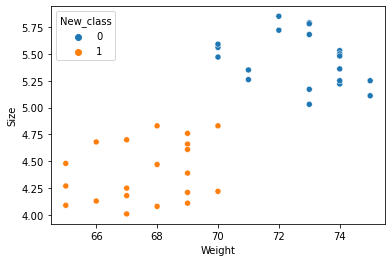

In [116]:
sns.scatterplot(df['Weight'],df['Size'],hue=df['New_class'])

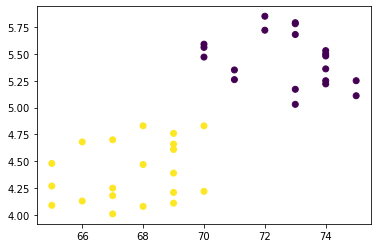

In [117]:
plt.scatter(df['Weight'],df['Size'],c=df["New_class"])

In [ ]:
x=df.drop("Clasess",axis=1)
y=df["Clasess"]
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# model Training

In [ ]:
svc_model = SVC(los)
svc_model.fit(x_train,y_train)

# Evalution

In [ ]:
#Testing Data
y_pred = svc_model.predict(x_test)
cnf_metrix = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cnf_metrix)
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy",accuracy)
clf_report = classification_report(y_test,y_pred)
print("classification report",clf_report)

In [ ]:
#Training Data
y_pred_train = svc_model.predict(x_train)
cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_metrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("accuarcy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("classification report",clf_report)

In [119]:
df = pd.read_csv("D:/Daily_Class_Note/3_11_SVM_Feature_Selection/Social_Network_Ads.csv")

In [120]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [121]:
df.drop("User ID",axis=1,inplace=True)

In [122]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [123]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

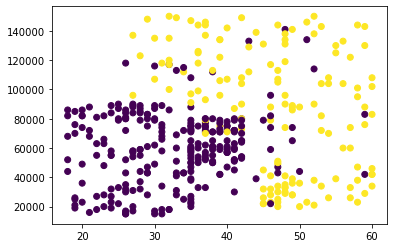

In [124]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])

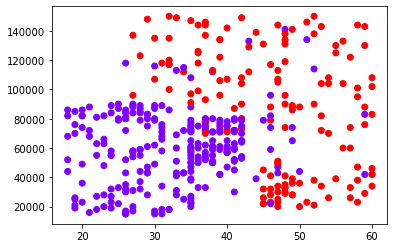

In [125]:
plt.scatter(df["Age"],df["EstimatedSalary"],c=df['Purchased'],cmap='rainbow')

In [126]:
df["Gender"].replace({"Male":0,"Female":1},inplace=True)

In [127]:
x= df.drop("Purchased",axis=1)
y= df['Purchased']

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Model Training

In [129]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [130]:
#Testing Data
y_pred = svc_model.predict(x_test)
cnf_metrix = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cnf_metrix)
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy",accuracy)
clf_report = classification_report(y_test,y_pred)
print("classification report",clf_report)

confusion matrix
 [[49  2]
 [18 11]]
accuarcy 0.75
classification report               precision    recall  f1-score   support

           0       0.73      0.96      0.83        51
           1       0.85      0.38      0.52        29

    accuracy                           0.75        80
   macro avg       0.79      0.67      0.68        80
weighted avg       0.77      0.75      0.72        80



In [131]:
#Training Data
y_pred_train = svc_model.predict(x_train)
cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_metrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("accuarcy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("classification report",clf_report)

confusion matrix
 [[197   9]
 [ 63  51]]
accuarcy 0.775
classification report               precision    recall  f1-score   support

           0       0.76      0.96      0.85       206
           1       0.85      0.45      0.59       114

    accuracy                           0.78       320
   macro avg       0.80      0.70      0.72       320
weighted avg       0.79      0.78      0.75       320



# Hyperparameter Tuning

In [ ]:
svc_models = SVC()


# C=1.0,
#     kernel='rbf',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     shrinking=True,
#     probability=False,
#     tol=0.001,
#     cache_size=200,
#     class_weight=None,
#     verbose=False,
#     max_iter=-1,
#     decision_function_shape='ovr',
#     break_ties=False,
#     random_state=None,
hyper = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        "C":np.arange(1,60)}
grid_ = GridSearchCV(svc_models,hyper,cv=4)
grid_.fit(x_train,y_train)


In [2]:
### hpyer parameter for tunnning 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge

C : float, default=1.0
    Regularization parameter. The strength of the regularization is
    inversely proportional to C. Must be strictly positive. The penalty
    is a squared l2 penalty.
    
    
Specifies the kernel type to be used in the algorithm.
    If none is given, 'rbf' will be used. If a callable is given it is
    used to pre-compute the kernel matrix from data matrices; that matrix
    should be an array of shape ``(n_samples, n_samples)`

In [3]:
hyper ={'kernal':['linear','poly','rbf','sigmod']# >>>>kernel matrix>>it take two  input vector and return the scale.i.e dot product of 
       "C":np.arange(1,60)}
SVC()

n the context of support vector machines (SVMs), the kernel is a function that takes in two input vectors and returns a scalar. The kernel function is used to calculate the dot product of two input vectors in a higher-dimensional space, where the dot product cannot be directly calculated in the original space.

In [19]:
hper={'kernel':['linear','poly','rbf','sigmoid','precomputed'],
     'C':np.arange(1,60)}

rand =RandomizedSearchCV(svc_model,hper,cv=4)
rand.fit(x_train,y_train)

NameError: name 'x_train' is not defined

# Hyperparameter tunning

In [20]:
#Testing Data
y_pred = svc_model.predict(x_test)
cnf_metrix = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cnf_metrix)
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy",accuracy)
clf_report = classification_report(y_test,y_pred)
print("classification report",clf_report)

NameError: name 'x_test' is not defined

In [21]:
#Training Data
y_pred_train = svc_models.predict(x_train)
cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_metrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("accuarcy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("classification report",clf_report)

NameError: name 'x_train' is not defined